In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import mean_squared_error

In [2]:
# Read the csv file into a pandas DataFrame
df=pd.read_csv("df_clinical_survival_time_ML.csv")
df.head()

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival_months,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_cellularity,encoded_pam50_+_claudin-low_subtype,encoded_er_status,encoded_her2_status,encoded_tumor_other_histologic_subtype,encoded_inferred_menopausal_state,encoded_integrative_cluster,encoded_pr_status
0,75.65,0,3.0,1,10,NaN,140.500000,1,22.0,2.0,1,1,3,6,1,0,0,0,4,0
1,43.19,0,3.0,1,0,2.0,84.633333,1,10.0,1.0,0,1,0,2,1,0,0,1,4,1
2,48.87,1,2.0,1,1,2.0,163.700000,0,15.0,2.0,1,1,0,3,1,0,0,1,3,1
3,47.68,1,2.0,1,3,1.0,164.933333,1,25.0,2.0,1,4,2,3,1,0,4,1,10,1
4,76.97,1,3.0,1,8,2.0,41.366667,1,40.0,2.0,1,4,0,3,1,0,4,0,10,1


In [3]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()


In [4]:
# Label-encode data set
label_encoder = LabelEncoder()
df['overall_survival_months'] = label_encoder.fit_transform(df['overall_survival_months'])

In [5]:
# Assign X (data) and y (target)

X = df.drop("overall_survival_months", axis=1).values
y = df['overall_survival_months'].values.reshape(-1,1)
print(X.shape, y.shape)

(1017, 19) (1017, 1)


In [6]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train = X_scaler.transform(X_train)
X_test= X_scaler.transform(X_test)
y_train= y_scaler.transform(y_train)
y_test= y_scaler.transform(y_test)



In [10]:
# Linear Regression
linreg= LinearRegression()
linreg.fit(X_train, y_train)
pred_linreg = linreg.predict(X_test)

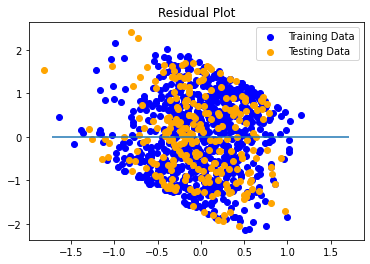

In [12]:
predictions = linreg.predict(X_test)
linreg.fit(X_train, y_train)
plt.scatter(linreg.predict(X_train), y_train - linreg.predict(X_train), c="blue", label="Training Data")
plt.scatter(linreg.predict(X_test), y_test - linreg.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [13]:
# calculate MSE and R2
MSE = mean_squared_error(y_test, pred_linreg)
r2 = linreg.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.8517861320151725, R2: 0.044234513296449895


In [14]:
lasso = Lasso(alpha=.01).fit(X_train, y_train)

linreg = lasso.predict(X_test)

MSE = mean_squared_error(y_test, linreg)
r2 = lasso.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8437265887373016, R2: 0.05327790225766549


In [15]:
ridge = Ridge(alpha=.01).fit(X_train, y_train)

linreg = ridge.predict(X_test)

MSE = mean_squared_error(y_test, linreg)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8517838079597195, R2: 0.04423712105432198


In [16]:
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

linreg = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, linreg)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8465286032245021, R2: 0.05013383986987607
